In [1]:
#import required modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#set to display all the columsn
pd.set_option('display.max_columns', 80)

In [3]:
#read in the data set

fraud_df = pd.read_csv('training.csv')
fraud_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [4]:
#check for missing data 

fraud_df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [5]:
#check for the columns
fraud_df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [6]:
#check the data info and data types

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [7]:
#check for description of the numerical columns

fraud_df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [8]:
#convert transaction date to datetime

fraud_df['Date'] = pd.to_datetime(fraud_df['TransactionStartTime'])


In [9]:
fraud_df['Year'] = fraud_df['Date'].dt.year

In [10]:
fraud_df['Month'] = fraud_df['Date'].dt.month

In [11]:
fraud_df['Day'] = fraud_df['Date'].dt.day

In [12]:
#Extracting time and day from the TransactionStartTime column to create new features


fraud_df['hour'] = pd.to_datetime(fraud_df.TransactionStartTime).dt.hour
fraud_df['minute'] = pd.to_datetime(fraud_df.TransactionStartTime).dt.minute


In [13]:
#fraud_df.drop(['Date'], axis = 1, inplace = True)
fraud_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Date,Year,Month,Day,hour,minute
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,2018-11-15 02:18:49+00:00,2018,11,15,2,18
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,2018-11-15 02:19:08+00:00,2018,11,15,2,19
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,2018-11-15 02:44:21+00:00,2018,11,15,2,44
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,2018-11-15 03:32:55+00:00,2018,11,15,3,32
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,2018-11-15 03:34:21+00:00,2018,11,15,3,34


In [14]:
fraud_df.drop(['Date'], axis = 1, inplace = True)
fraud_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Year,Month,Day,hour,minute
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,2018,11,15,2,18
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,2018,11,15,2,19
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,2018,11,15,2,44
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,2018,11,15,3,32
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,2018,11,15,3,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0,2019,2,13,9,54
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0,2019,2,13,9,54
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0,2019,2,13,9,54
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0,2019,2,13,10,1


In [15]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [16]:
#extracting the categorical colums from the dataframe

categorical = [var for var in fraud_df.columns if fraud_df[var].dtype=='O']

print('There are {} categorical variabes \n'.format(len(categorical)))

print('They are: ', categorical)

There are 11 categorical variabes 

They are:  ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']


In [17]:
#looking through the categorical columns

fraud_df[categorical].head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3,2018-11-15T02:18:49Z
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-15T02:19:08Z
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,ProviderId_6,ProductId_1,airtime,ChannelId_3,2018-11-15T02:44:21Z
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,2018-11-15T03:32:55Z
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-15T03:34:21Z


In [18]:
fraud_df.ProductCategory.unique()

array(['airtime', 'financial_services', 'utility_bill', 'data_bundles',
       'tv', 'transport', 'ticket', 'movies', 'other'], dtype=object)

In [19]:
len(fraud_df.BatchId.unique())

94809

In [20]:
len(fraud_df.AccountId.unique())

3633

In [21]:
len(fraud_df.CustomerId.unique())

3742

In [22]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [23]:
len(fraud_df.ProviderId.unique())

6

In [24]:
fraud_df.ProviderId.value_counts()

ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: ProviderId, dtype: int64

In [25]:
#Count of fraudulent and non-fraudulent cases
print("Fraudulent: {}".format((fraud_df["FraudResult"]==1).sum()))
print("Non-Fraudulent: {}".format((fraud_df["FraudResult"]==0).sum()))

Fraudulent: 193
Non-Fraudulent: 95469


Text(0.5, 1.0, 'Fraudulent VS Non-Fraudulent')

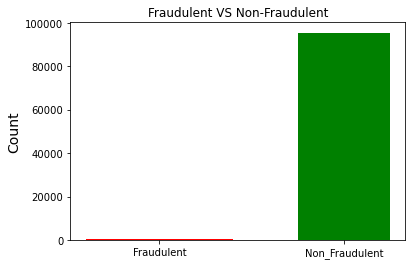

In [26]:
#Visualising Fraudulent and non-fraudulent cases
plt.bar("Fraudulent", fraud_df["FraudResult"].value_counts()[1], color="red")
plt.bar("Non_Fraudulent", fraud_df["FraudResult"].value_counts()[0], width=0.5, color="green")
plt.ylabel("Count", fontsize=14)
plt.title("Fraudulent VS Non-Fraudulent")

In [27]:
#label encoding columns
columns = fraud_df.columns.tolist()[1:11]

le = LabelEncoder()
for each in columns:
    fraud_df[each] = le.fit_transform(fraud_df[each])

    


In [28]:
fraud_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Year,Month,Day,hour,minute
0,TransactionId_76871,46980,2490,3535,2584,0,0,5,1,0,2,1000.0,1000,2018-11-15T02:18:49Z,2,0,2018,11,15,2,18
1,TransactionId_73770,31755,3219,2366,2584,0,0,3,19,2,1,-20.0,20,2018-11-15T02:19:08Z,2,0,2018,11,15,2,19
2,TransactionId_26203,60272,2713,996,2806,0,0,5,0,0,2,500.0,500,2018-11-15T02:44:21Z,2,0,2018,11,15,2,44
3,TransactionId_380,1797,3351,974,3733,0,0,0,11,8,2,20000.0,21800,2018-11-15T03:32:55Z,2,0,2018,11,15,3,32
4,TransactionId_28195,48941,3219,2366,3733,0,0,3,19,2,1,-644.0,644,2018-11-15T03:34:21Z,2,0,2018,11,15,3,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,92361,3219,2366,1504,0,0,3,19,2,1,-1000.0,1000,2019-02-13T09:54:09Z,2,0,2019,2,13,9,54
95658,TransactionId_91597,46175,2055,1349,2154,0,0,5,1,0,2,1000.0,1000,2019-02-13T09:54:25Z,2,0,2019,2,13,9,54
95659,TransactionId_82501,13891,3219,2366,2154,0,0,3,19,2,1,-20.0,20,2019-02-13T09:54:35Z,2,0,2019,2,13,9,54
95660,TransactionId_136354,73014,296,3344,521,0,0,5,8,7,2,3000.0,3000,2019-02-13T10:01:10Z,2,0,2019,2,13,10,1


In [29]:
#getting categorical dummies
categorical_columns = ["ProviderId", "ProductCategory","ProductId","ChannelId"]
new_fraud_df = pd.get_dummies(fraud_df, columns=categorical_columns)
new_fraud_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Year,Month,Day,hour,minute,ProviderId_0,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4,ProductCategory_5,ProductCategory_6,ProductCategory_7,ProductCategory_8,ProductId_0,ProductId_1,ProductId_2,ProductId_3,ProductId_4,ProductId_5,ProductId_6,ProductId_7,ProductId_8,ProductId_9,ProductId_10,ProductId_11,ProductId_12,ProductId_13,ProductId_14,ProductId_15,ProductId_16,ProductId_17,ProductId_18,ProductId_19,ProductId_20,ProductId_21,ProductId_22,ChannelId_0,ChannelId_1,ChannelId_2,ChannelId_3
0,TransactionId_76871,46980,2490,3535,2584,0,0,1000.0,1000,2018-11-15T02:18:49Z,2,0,2018,11,15,2,18,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,TransactionId_73770,31755,3219,2366,2584,0,0,-20.0,20,2018-11-15T02:19:08Z,2,0,2018,11,15,2,19,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,TransactionId_26203,60272,2713,996,2806,0,0,500.0,500,2018-11-15T02:44:21Z,2,0,2018,11,15,2,44,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,TransactionId_380,1797,3351,974,3733,0,0,20000.0,21800,2018-11-15T03:32:55Z,2,0,2018,11,15,3,32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,TransactionId_28195,48941,3219,2366,3733,0,0,-644.0,644,2018-11-15T03:34:21Z,2,0,2018,11,15,3,34,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [30]:
 new_fraud_df.drop(["TransactionStartTime"], axis=1, inplace=True)

new_fraud_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,PricingStrategy,FraudResult,Year,Month,Day,hour,minute,ProviderId_0,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4,ProductCategory_5,ProductCategory_6,ProductCategory_7,ProductCategory_8,ProductId_0,ProductId_1,ProductId_2,ProductId_3,ProductId_4,ProductId_5,ProductId_6,ProductId_7,ProductId_8,ProductId_9,ProductId_10,ProductId_11,ProductId_12,ProductId_13,ProductId_14,ProductId_15,ProductId_16,ProductId_17,ProductId_18,ProductId_19,ProductId_20,ProductId_21,ProductId_22,ChannelId_0,ChannelId_1,ChannelId_2,ChannelId_3
0,TransactionId_76871,46980,2490,3535,2584,0,0,1000.0,1000,2,0,2018,11,15,2,18,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,TransactionId_73770,31755,3219,2366,2584,0,0,-20.0,20,2,0,2018,11,15,2,19,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,TransactionId_26203,60272,2713,996,2806,0,0,500.0,500,2,0,2018,11,15,2,44,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,TransactionId_380,1797,3351,974,3733,0,0,20000.0,21800,2,0,2018,11,15,3,32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,TransactionId_28195,48941,3219,2366,3733,0,0,-644.0,644,2,0,2018,11,15,3,34,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,92361,3219,2366,1504,0,0,-1000.0,1000,2,0,2019,2,13,9,54,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
95658,TransactionId_91597,46175,2055,1349,2154,0,0,1000.0,1000,2,0,2019,2,13,9,54,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
95659,TransactionId_82501,13891,3219,2366,2154,0,0,-20.0,20,2,0,2019,2,13,9,54,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
95660,TransactionId_136354,73014,296,3344,521,0,0,3000.0,3000,2,0,2019,2,13,10,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


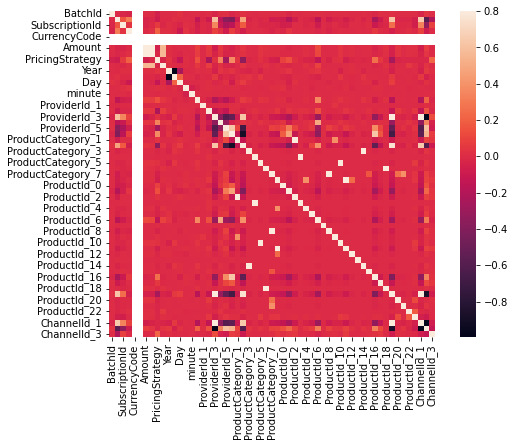

In [31]:
df = (new_fraud_df.loc[:, new_fraud_df.columns != 'TransactionId'])
#df.head()
correlations = df.corr()
fig = plt.figure(figsize = (9, 6))


sns.heatmap(correlations, vmax = .8, square = True)
plt.show()

Text(0.5, 1.0, 'correlation bar_hist')

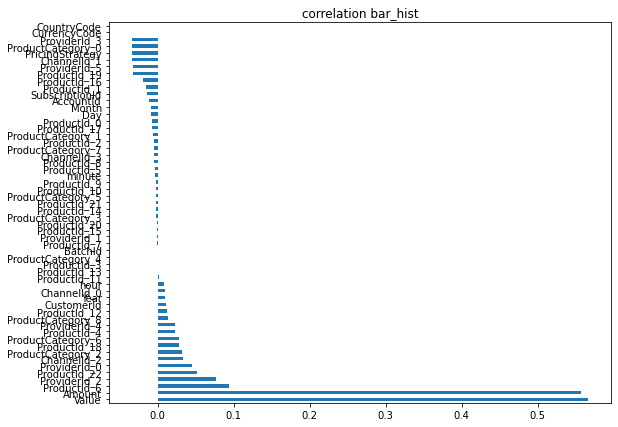

In [32]:
# Visualizing correlations of the various features to fraud_result
(correlations
     .FraudResult
     .drop("FraudResult") # can't compare the variable under study to itself
     .sort_values(ascending=False)
     .plot
     .barh(figsize=(9,7)))
plt.title("correlation bar_hist")

In [33]:
new_fraud_df["period"] = np.nan

In [34]:
#grouping hours into time of the day i.e em for Early morning, 
#am for morning, mid for mid day, eve for evening and pm for afternoon

new_fraud_df.loc[new_fraud_df.hour < 7, "period"] = 'em'
new_fraud_df.loc[(new_fraud_df.hour >= 7) & (new_fraud_df.hour < 11), "period"] = 'am'
new_fraud_df.loc[(new_fraud_df.hour >= 11) & (new_fraud_df.hour < 15), "period"] = 'mid'
new_fraud_df.loc[(new_fraud_df.hour >= 15) & (new_fraud_df.hour < 19), "period"] = 'eve'
new_fraud_df.loc[(new_fraud_df.hour >= 19) & (new_fraud_df.hour <= 24), "period"] = 'pm'

In [35]:
# Encoding the period feature columns
le = LabelEncoder()
new_fraud_df["period"] = le.fit_transform(new_fraud_df["period"])


In [36]:
new_fraud_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,PricingStrategy,FraudResult,Year,Month,Day,hour,minute,ProviderId_0,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4,ProductCategory_5,ProductCategory_6,ProductCategory_7,ProductCategory_8,ProductId_0,ProductId_1,ProductId_2,ProductId_3,ProductId_4,ProductId_5,ProductId_6,ProductId_7,ProductId_8,ProductId_9,ProductId_10,ProductId_11,ProductId_12,ProductId_13,ProductId_14,ProductId_15,ProductId_16,ProductId_17,ProductId_18,ProductId_19,ProductId_20,ProductId_21,ProductId_22,ChannelId_0,ChannelId_1,ChannelId_2,ChannelId_3,period
0,TransactionId_76871,46980,2490,3535,2584,0,0,1000.0,1000,2,0,2018,11,15,2,18,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,TransactionId_73770,31755,3219,2366,2584,0,0,-20.0,20,2,0,2018,11,15,2,19,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,TransactionId_26203,60272,2713,996,2806,0,0,500.0,500,2,0,2018,11,15,2,44,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,TransactionId_380,1797,3351,974,3733,0,0,20000.0,21800,2,0,2018,11,15,3,32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,TransactionId_28195,48941,3219,2366,3733,0,0,-644.0,644,2,0,2018,11,15,3,34,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [37]:
new_fraud_df['period_gp'] = np.log1p(new_fraud_df.groupby('period').cumcount() + 1)

In [38]:
new_fraud_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,PricingStrategy,FraudResult,Year,Month,Day,hour,minute,ProviderId_0,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4,ProductCategory_5,ProductCategory_6,ProductCategory_7,ProductCategory_8,ProductId_0,ProductId_1,ProductId_2,ProductId_3,ProductId_4,ProductId_5,ProductId_6,ProductId_7,ProductId_8,ProductId_9,ProductId_10,ProductId_11,ProductId_12,ProductId_13,ProductId_14,ProductId_15,ProductId_16,ProductId_17,ProductId_18,ProductId_19,ProductId_20,ProductId_21,ProductId_22,ChannelId_0,ChannelId_1,ChannelId_2,ChannelId_3,period,period_gp
0,TransactionId_76871,46980,2490,3535,2584,0,0,1000.0,1000,2,0,2018,11,15,2,18,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.693147
1,TransactionId_73770,31755,3219,2366,2584,0,0,-20.0,20,2,0,2018,11,15,2,19,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1.098612
2,TransactionId_26203,60272,2713,996,2806,0,0,500.0,500,2,0,2018,11,15,2,44,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.386294
3,TransactionId_380,1797,3351,974,3733,0,0,20000.0,21800,2,0,2018,11,15,3,32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.609438
4,TransactionId_28195,48941,3219,2366,3733,0,0,-644.0,644,2,0,2018,11,15,3,34,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1.791759


In [39]:
# Dropping columns with negative correlation to the fraudresult
columns_to_drop = ["SubscriptionId"]

new_fraud_df = new_fraud_df.drop(columns_to_drop, axis=1)

Text(0.5, 1.0, 'correlation bar_hist')

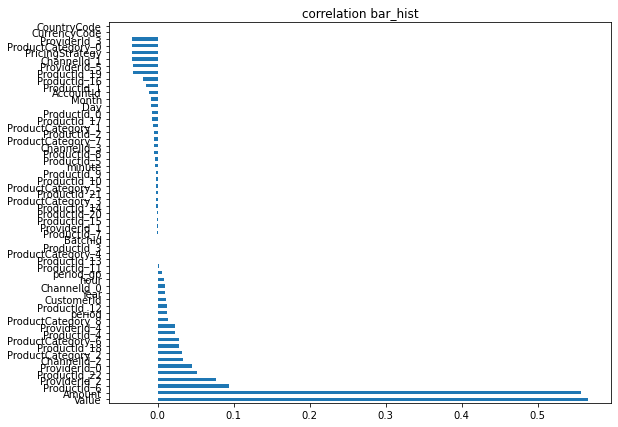

In [40]:
new_correlations = new_fraud_df.corr()

# Visualizing correlations of new features to fraud_result
(new_correlations
     .FraudResult
     .drop("FraudResult") # can't compare the variable under study to itself
     .sort_values(ascending=False)
     .plot
     .barh(figsize=(9,7)))
plt.title("correlation bar_hist")

In [41]:
#Normalizing Amount and value columns to absolute value
new_fraud_df["Value"] = new_fraud_df["Value"].abs()
new_fraud_df["Amount"] = new_fraud_df["Amount"].abs()


In [42]:
# dropping non-predictor feature columns and the target
target = new_fraud_df["FraudResult"]
clean_fraud_df = new_fraud_df.drop(["TransactionId", "FraudResult"], axis=1)
features = clean_fraud_df

In [43]:
clean_fraud_df

,BatchId,AccountId,CustomerId,CurrencyCode,CountryCode,Amount,Value,PricingStrategy,Year,Month,Day,hour,minute,ProviderId_0,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4,ProductCategory_5,ProductCategory_6,ProductCategory_7,ProductCategory_8,ProductId_0,ProductId_1,ProductId_2,ProductId_3,ProductId_4,ProductId_5,ProductId_6,ProductId_7,ProductId_8,ProductId_9,ProductId_10,ProductId_11,ProductId_12,ProductId_13,ProductId_14,ProductId_15,ProductId_16,ProductId_17,ProductId_18,ProductId_19,ProductId_20,ProductId_21,ProductId_22,ChannelId_0,ChannelId_1,ChannelId_2,ChannelId_3,period,period_gp
0,46980,2490,2584,0,0,1000.0,1000,2,2018,11,15,2,18,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.693147
1,31755,3219,2584,0,0,20.0,20,2,2018,11,15,2,19,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1.098612
2,60272,2713,2806,0,0,500.0,500,2,2018,11,15,2,44,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.386294
3,1797,3351,3733,0,0,20000.0,21800,2,2018,11,15,3,32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.609438
4,48941,3219,3733,0,0,644.0,644,2,2018,11,15,3,34,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,92361,3219,1504,0,0,1000.0,1000,2,2019,2,13,9,54,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,10.033989
95658,46175,2055,2154,0,0,1000.0,1000,2,2019,2,13,9,54,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10.034033
95659,13891,3219,2154,0,0,20.0,20,2,2019,2,13,9,54,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,10.034077
95660,73014,296,521,0,0,3000.0,3000,2,2019,2,13,10,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10.034121


In [44]:
#split data into the target and the features
y = target

X = features

#split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,
                                                  random_state=1)

In [45]:
#check the share of our split

X_train.shape, X_test.shape

((76529, 57), (19133, 57))

feature engineering

In [46]:
cols = X_train.columns

In [47]:
#feature scaling

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [48]:
X_test

array([[0.0429022 , 0.88625723, 0.67477935, ..., 0.        , 1.        ,
        0.85058789],
       [0.75635305, 0.63811622, 0.64509227, ..., 0.        , 1.        ,
        0.8425428 ],
       [0.06042385, 0.51115395, 0.52473924, ..., 0.        , 0.5       ,
        0.89522812],
       ...,
       [0.89376246, 0.29964197, 0.33056967, ..., 0.        , 0.75      ,
        0.7833794 ],
       [0.88901548, 0.46736436, 0.4827494 , ..., 0.        , 0.5       ,
        0.94287788],
       [0.1813876 , 0.2343707 , 0.27253276, ..., 0.        , 0.25      ,
        0.69301212]])

In [50]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train

,BatchId,AccountId,CustomerId,CurrencyCode,CountryCode,Amount,Value,PricingStrategy,Year,Month,Day,hour,minute,ProviderId_0,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4,ProductCategory_5,ProductCategory_6,ProductCategory_7,ProductCategory_8,ProductId_0,ProductId_1,ProductId_2,ProductId_3,ProductId_4,ProductId_5,ProductId_6,ProductId_7,ProductId_8,ProductId_9,ProductId_10,ProductId_11,ProductId_12,ProductId_13,ProductId_14,ProductId_15,ProductId_16,ProductId_17,ProductId_18,ProductId_19,ProductId_20,ProductId_21,ProductId_22,ChannelId_0,ChannelId_1,ChannelId_2,ChannelId_3,period,period_gp
0,0.242184,0.455396,0.471532,0.0,0.0,1.214448e-03,1.214373e-03,0.5,1.0,0.090909,0.000000,0.739130,0.813559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50,0.984692
1,0.036927,0.251652,0.287356,0.0,0.0,5.047976e-05,5.040487e-05,0.5,1.0,0.000000,0.900000,0.521739,0.355932,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.75,0.953835
2,0.418287,0.886289,0.679230,0.0,0.0,4.933199e-06,4.858301e-06,0.5,1.0,0.090909,0.100000,0.521739,0.271186,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.75,0.966692
3,0.640410,0.886289,0.446939,0.0,0.0,8.846155e-07,8.097168e-07,0.5,0.0,0.909091,0.500000,0.782609,0.711864,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.50,0.598891
4,0.401738,0.975496,0.045175,0.0,0.0,1.012018e-03,1.011944e-03,1.0,0.0,0.909091,0.733333,0.652174,0.186441,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50,0.694663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76524,0.406210,0.886289,0.150762,0.0,0.0,6.282794e-05,6.275305e-05,0.5,0.0,1.000000,0.266667,0.391304,0.389831,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.810436
76525,0.151707,0.886289,0.777065,0.0,0.0,5.059454e-04,5.058705e-04,0.5,1.0,0.000000,0.800000,0.826087,0.864407,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.00,0.869467
76526,0.266286,0.886289,0.645282,0.0,0.0,9.993928e-06,9.919030e-06,0.5,1.0,0.000000,0.066667,0.913043,0.084746,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.00,0.827383
76527,0.506255,0.886289,0.715049,0.0,0.0,4.933199e-06,4.858301e-06,0.5,0.0,0.909091,0.666667,0.695652,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.50,0.675084


In [51]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [52]:
X_test

,BatchId,AccountId,CustomerId,CurrencyCode,CountryCode,Amount,Value,PricingStrategy,Year,Month,Day,hour,minute,ProviderId_0,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4,ProductCategory_5,ProductCategory_6,ProductCategory_7,ProductCategory_8,ProductId_0,ProductId_1,ProductId_2,ProductId_3,ProductId_4,ProductId_5,ProductId_6,ProductId_7,ProductId_8,ProductId_9,ProductId_10,ProductId_11,ProductId_12,ProductId_13,ProductId_14,ProductId_15,ProductId_16,ProductId_17,ProductId_18,ProductId_19,ProductId_20,ProductId_21,ProductId_22,ChannelId_0,ChannelId_1,ChannelId_2,ChannelId_3,period,period_gp
0,0.042902,0.886257,0.674779,0.0,0.0,0.000010,0.000010,0.5,1.0,0.000000,0.566667,0.869565,0.762712,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.00,0.850588
1,0.756353,0.638116,0.645092,0.0,0.0,0.000203,0.000203,0.5,1.0,0.000000,0.433333,0.913043,0.949153,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.00,0.842543
2,0.060424,0.511154,0.524739,0.0,0.0,0.000203,0.000203,0.5,0.0,1.000000,0.600000,0.652174,0.186441,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50,0.895228
3,0.619165,0.886257,0.958813,0.0,0.0,0.000005,0.000005,0.5,1.0,0.000000,1.000000,0.782609,0.118644,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.50,0.981085
4,0.649662,0.886257,0.920834,0.0,0.0,0.000507,0.000507,0.5,0.0,1.000000,0.666667,0.173913,0.288136,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.25,0.816569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19128,0.461945,0.516662,0.529553,0.0,0.0,0.001014,0.001014,0.5,1.0,0.000000,0.966667,0.478261,0.118644,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.75,0.954166
19129,0.789772,0.768108,0.769457,0.0,0.0,0.000101,0.000101,0.5,1.0,0.000000,0.433333,0.304348,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.922872
19130,0.893762,0.299642,0.330570,0.0,0.0,0.000355,0.000355,0.5,0.0,1.000000,0.100000,0.565217,0.372881,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.75,0.783379
19131,0.889015,0.467364,0.482749,0.0,0.0,0.000101,0.000101,0.5,1.0,0.000000,0.200000,0.739130,0.508475,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50,0.942878


In [54]:
#fitting model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

C:\Users\USER\anacnew\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(random_state=0, solver='liblinear')

In [55]:
#test data
y_pred_test = logreg.predict(X_test)

C:\Users\USER\anacnew\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [56]:
y_pred_test_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
#probability of getting 1, i.e , Fraudulent

logreg.predict_proba(X_test)[:,1]

C:\Users\USER\anacnew\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([1.59614860e-04, 3.56528768e-04, 5.31932892e-03, ...,
       6.65725037e-05, 2.68849921e-04, 1.20726864e-04])

In [58]:
#check for accuracy 

from sklearn.metrics import accuracy_score

print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_test))

Model accuracy score(test):  0.9981184341190613


In [59]:
y_pred_train = logreg.predict(X_train)

print('Model accuracy score(train): ', accuracy_score(y_train, y_pred_train))

Model accuracy score(train):  0.9984189000248271


C:\Users\USER\anacnew\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [60]:
#model accuracy metrics for logistic regression
print('Training set score: ', logreg.score(X_train, y_train))

print('Test set score: ', logreg.score(X_test, y_test))

Training set score:  0.9984189000248271
Test set score:  0.9981184341190613


C:\Users\USER\anacnew\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\USER\anacnew\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [61]:
#comparing this null accuracy to the model accuracy 

y_test.value_counts()

0    19094
1       39
Name: FraudResult, dtype: int64

In [65]:
#check null accuracy 
null_acuracy =19094/(len(y_test))

In [66]:
null_acuracy

0.9979616369623164

In [67]:
#there is a very little difference between the null accuracy and the actual accuracy, however the null accuracy 
#lesser. we will check further with the confusion metrics.

In [68]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred_test)

In [69]:
cm

array([[19094,     0],
       [   36,     3]], dtype=int64)

In [70]:
print('True positives (TP) = ', cm[0,0])
print('False positives (FP)= ', cm[0, 1])
print('False Negatives (FN)= ', cm[1, 0])
print('True Negatives (TN))= ', cm[1, 1])

True positives (TP) =  19094
False positives (FP)=  0
False Negatives (FN)=  36
True Negatives (TN))=  3


True positives (Actual positives:1, predict positive:1) -19094

True negatives (Actual negative: 0, predict negative:0 ) - 3

False positives (actual negative:0, predicted positive: 1) -0 (Type I error)

False negative (actual positive :1, predicted negative: 0) 3084 (Type II error)



In [71]:
#visualze with heatmap
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

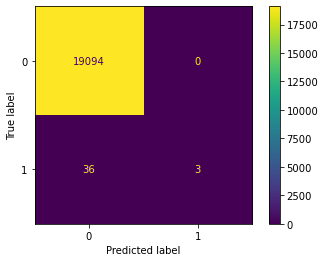

In [72]:
disp.plot()

#### Classification report
This is another way of evaluating a classification model. It displays the precision, recall and f1 of the model (each will be discussed as we go on)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       1.00      0.08      0.14        39

    accuracy                           1.00     19133
   macro avg       1.00      0.54      0.57     19133
weighted avg       1.00      1.00      1.00     19133



Precision (what percent of your prediction is correct?)
It is the ability of the classifier not to label an observation as positive when it is not. in other words, it is the accuracy of the positive prediction.

To calculate it, precision = TP/(TP+FN)

In [74]:
# precision

19094/(19094+36)

0.9981181390486148

In [75]:
#tunning with ROC-AUC

y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

C:\Users\USER\anacnew\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[9.99840385e-01, 1.59614860e-04],
       [9.99643471e-01, 3.56528768e-04],
       [9.94680671e-01, 5.31932892e-03],
       ...,
       [9.99933427e-01, 6.65725037e-05],
       [9.99731150e-01, 2.68849921e-04],
       [9.99879273e-01, 1.20726864e-04]])

In [76]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Probability of Non-Fraudulent Transaction (0)',
                                                         'Probability of Fraudulent Transaction (1)'])

y_pred_prob_df

,Probability of Non-Fraudulent Transaction (0),Probability of Fraudulent Transaction (1)
0,0.999840,0.000160
1,0.999643,0.000357
2,0.994681,0.005319
3,0.999838,0.000162
4,0.999919,0.000081
...,...,...
19128,0.992588,0.007412
19129,0.999782,0.000218
19130,0.999933,0.000067
19131,0.999731,0.000269


In [77]:
y_pred1 = logreg.predict_proba(X_test)[:,1]
y_pred0 = logreg.predict_proba(X_test)[:,0]

C:\Users\USER\anacnew\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\USER\anacnew\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [83]:
#plot ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

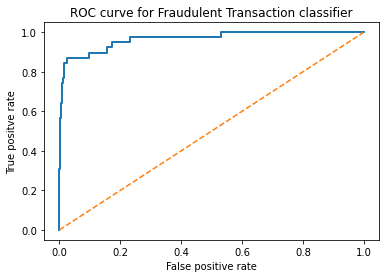

In [84]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC curve for Fraudulent Transaction classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()

In [85]:
#computing AUC 

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print(ROC_AUC)

0.9658571762374004
